In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [4]:
data = pd.read_csv("train_dataset.csv")

In [5]:
data.shape

(1017, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [7]:
data.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'actual_productivity'],
      dtype='object')

In [8]:
data.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003


In [9]:
data.isnull().sum()

team                       0
targeted_productivity      0
smv                        0
wip                      423
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
month                      0
quarter_Quarter1           0
quarter_Quarter2           0
quarter_Quarter3           0
quarter_Quarter4           0
quarter_Quarter5           0
department_finishing       0
department_finishing       0
department_sweing          0
day_Monday                 0
day_Saturday               0
day_Sunday                 0
day_Thursday               0
day_Tuesday                0
day_Wednesday              0
actual_productivity        0
dtype: int64

In [10]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
count,1017.000000,1017.000000,1017.000000,594.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,...,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,6.443461,0.730747,15.150492,1183.183502,4532.940020,40.689282,0.564405,0.398230,0.160275,34.846116,...,0.201573,0.214356,0.584071,0.161259,0.152409,0.164208,0.165192,0.171091,0.185841,0.736509
std,3.472473,0.097384,10.946096,1793.836719,3275.997333,173.240655,10.093731,3.351712,0.440199,22.185292,...,0.401373,0.410577,0.493124,0.367950,0.359594,0.370647,0.371536,0.376774,0.389169,0.174304
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233705
25%,3.000000,0.700000,3.940000,770.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.651515
50%,7.000000,0.750000,15.260000,1039.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773333
75%,9.000000,0.800000,24.260000,1254.750000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850170
max,12.000000,0.800000,54.560000,23122.000000,15120.000000,3600.000000,270.000000,45.000000,2.000000,89.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.108125


# **Replacing the missing values with mean**

In [11]:
data["wip"]=data["wip"].fillna(data["wip"].mean()) 

# Checking for the distribution of data

[Text(0.5, 1.0, 'Actual productivity gained in general')]

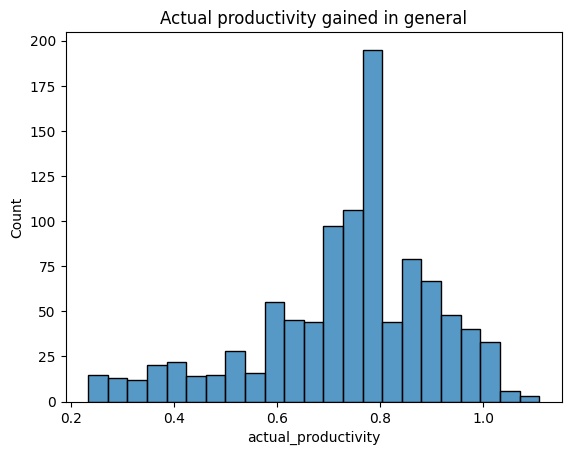

In [12]:
# In order to guage maximum productivity in actual
sns.histplot(data['actual_productivity'], kde=False).set(title="Actual productivity gained in general")

# Checking for the correlation

<Axes: >

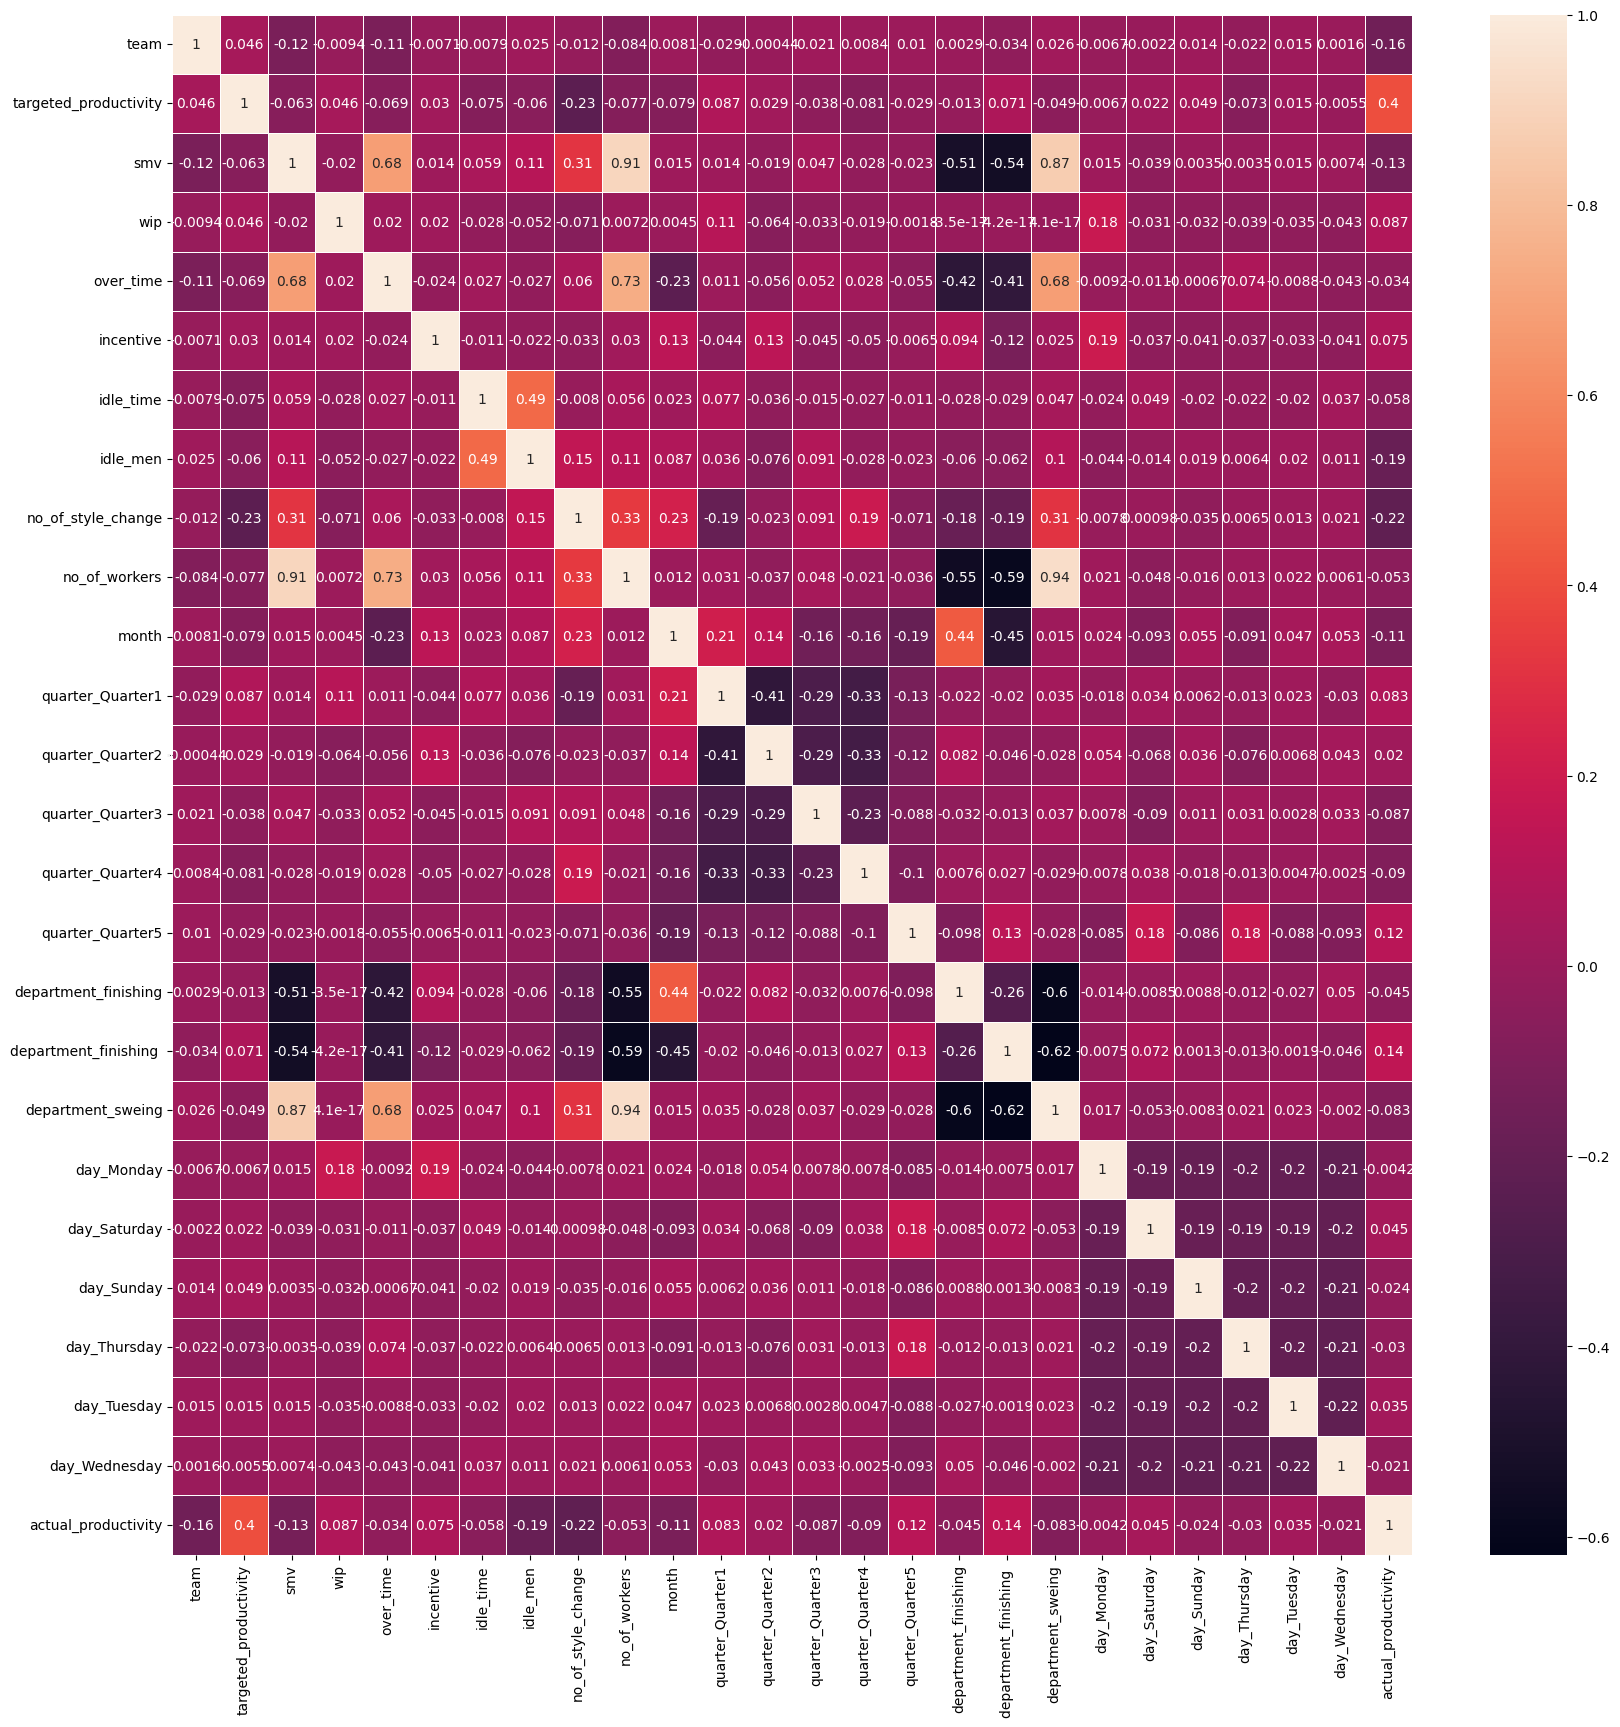

In [13]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(20,20)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)

# Convert correlation matrix to 1-D Series and sort

In [14]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corrMatrix.unstack().sort_values()
pd.set_option('display.max_rows', None) 
sorted_mat.tail(100)

actual_productivity    quarter_Quarter1         0.082608
quarter_Quarter1       actual_productivity      0.082608
month                  idle_men                 0.086587
idle_men               month                    0.086587
quarter_Quarter1       targeted_productivity    0.086722
targeted_productivity  quarter_Quarter1         0.086722
actual_productivity    wip                      0.087362
wip                    actual_productivity      0.087362
idle_men               quarter_Quarter3         0.090700
quarter_Quarter3       idle_men                 0.090700
no_of_style_change     quarter_Quarter3         0.090840
quarter_Quarter3       no_of_style_change       0.090840
department_finishing   incentive                0.094254
incentive              department_finishing     0.094254
idle_men               department_sweing        0.100313
department_sweing      idle_men                 0.100313
wip                    quarter_Quarter1         0.108699
quarter_Quarter1       wip     

# Box plot

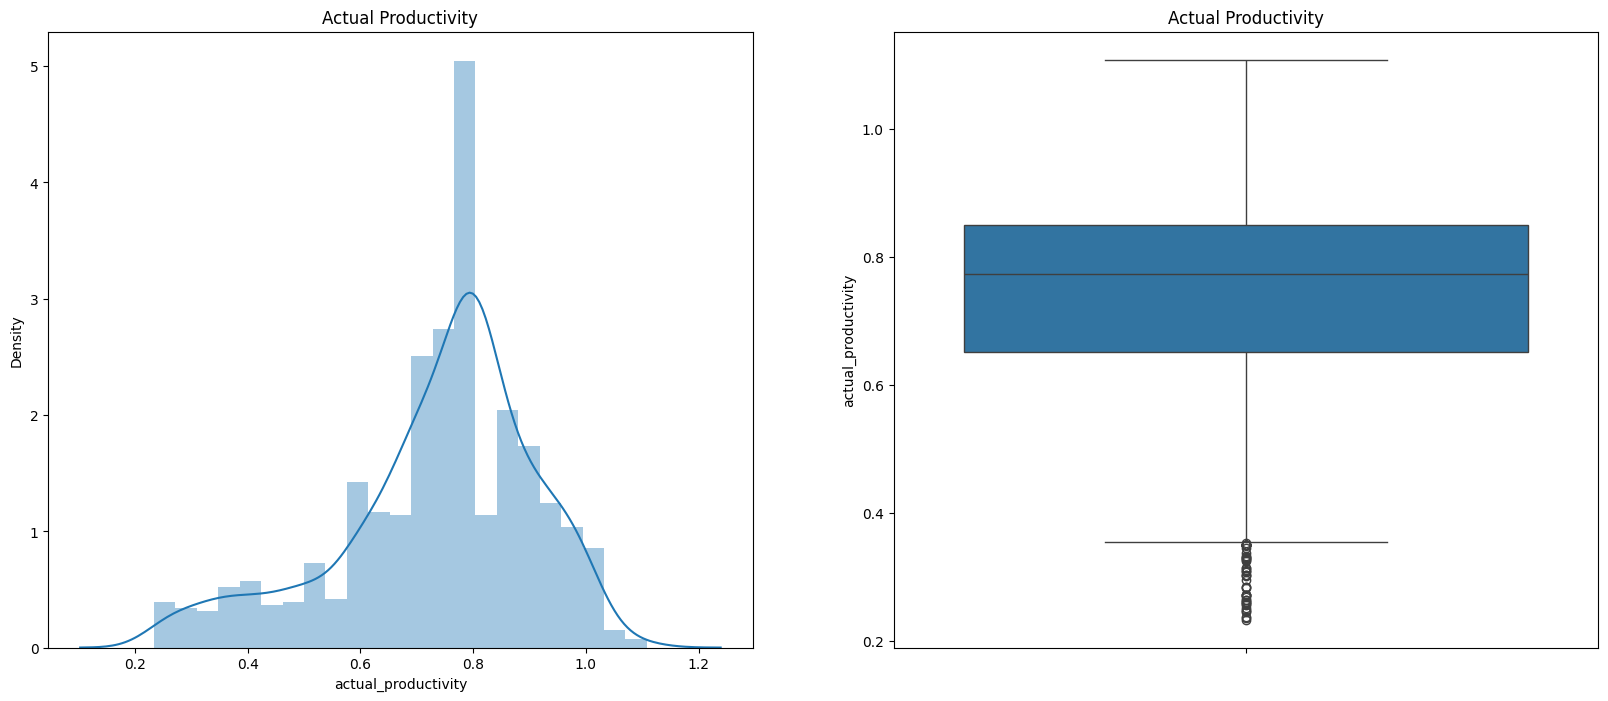

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Actual Productivity')
sns.distplot(data.actual_productivity)

plt.subplot(1,2,2)
plt.title('Actual Productivity')
sns.boxplot(y=data.actual_productivity)


plt.show()

In [16]:
X= data.iloc[:,:-1]
y = data["actual_productivity"]

In [17]:
X.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,9,0.75,3.94,1183.183502,960,0,0.0,0,0,8.0,...,0,1,0,0,0,0,0,0,0,1
1,7,0.65,30.10,909.000000,7080,0,0.0,0,1,59.0,...,0,0,0,1,0,0,0,1,0,0
2,3,0.80,4.15,1183.183502,1440,0,0.0,0,0,7.0,...,0,0,1,0,0,0,0,0,0,1
3,1,0.65,22.53,762.000000,5040,0,0.0,0,1,42.0,...,0,0,0,1,0,0,0,0,0,1
4,4,0.70,30.10,767.000000,3300,50,0.0,0,1,57.0,...,0,0,0,1,1,0,0,0,0,0


In [18]:
y.head()

0    0.755167
1    0.535678
2    0.820833
3    0.581131
4    0.790003
Name: actual_productivity, dtype: float64

In [19]:
X.shape

(1017, 25)

In [20]:
y.shape

(1017,)

In [21]:
X.isnull().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
dtype: int64